## importing libary

In [2]:
import numpy as np
import pandas as pd
import calendar

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)

In [3]:
df_holi = pd.read_csv(r'C:\Users\82102\OneDrive\바탕 화면\dataset\timeseries_demand_data\holidays_events.csv')
df_oil = pd.read_csv(r'C:\Users\82102\OneDrive\바탕 화면\dataset\timeseries_demand_data\oil.csv')
df_stores = pd.read_csv(r'C:\Users\82102\OneDrive\바탕 화면\dataset\timeseries_demand_data\stores.csv')
df_test = pd.read_csv(r'C:\Users\82102\OneDrive\바탕 화면\dataset\timeseries_demand_data\test.csv')
df_train = pd.read_csv(r'C:\Users\82102\OneDrive\바탕 화면\dataset\timeseries_demand_data\train.csv')
df_trans = pd.read_csv(r'C:\Users\82102\OneDrive\바탕 화면\dataset\timeseries_demand_data\transactions.csv')

In [4]:
df = df_train.merge(df_holi, on = 'date', how='left')
df = df.merge(df_oil, on = 'date', how = 'left')
df = df.merge(df_stores, on = 'store_nbr', how = 'left')
df = df.merge(df_trans, on = ['date', 'store_nbr'], how = 'left')
# type 컬럼이 두개이므로 type_x, type_y 형태로 컬럼이 생성됨 rename 해줘야함
df = df.rename(columns = {'type_x' : 'holiday_type', 'type_y' : 'store_type'})

In [5]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


In [6]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['quarter'] = df['date'].dt.quarter
df['day_of_week'] = df['date'].dt.day_name()
df.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday


## Average Sales Analysis 

In [7]:
df.columns.tolist()

['id',
 'date',
 'store_nbr',
 'family',
 'sales',
 'onpromotion',
 'holiday_type',
 'locale',
 'locale_name',
 'description',
 'transferred',
 'dcoilwtico',
 'city',
 'state',
 'store_type',
 'cluster',
 'transactions',
 'year',
 'month',
 'week',
 'quarter',
 'day_of_week']

In [8]:
# set data
# store type, family(제품군), cluster(store군집) 별 sales의 평균을 관찰
df_stores_sales = df.groupby('store_type').agg({'sales' : 'mean'}).reset_index().sort_values(by = 'sales', ascending = False)
df_family_sales = df.groupby('family').agg({'sales' : 'mean'}).reset_index().sort_values(by = 'sales', ascending = False)[:10]
df_cluster_sales = df.groupby('cluster').agg({'sales' : 'mean'}).reset_index()

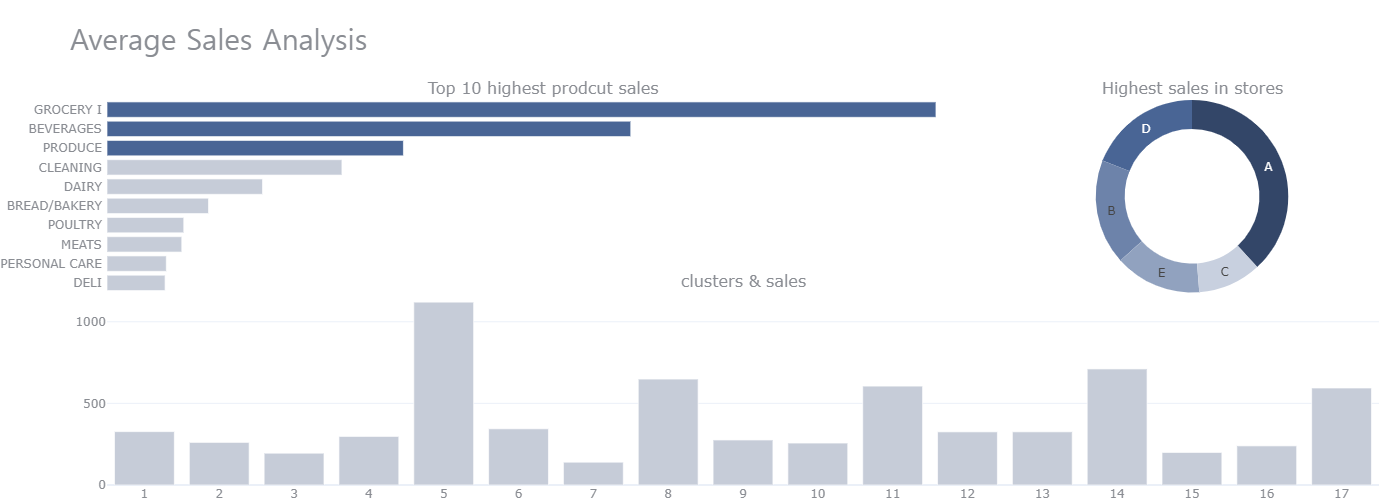

In [9]:
# graph color
df_family_sales['color'] = '#496595'
df_family_sales['color'][3:] = '#c6ccd8'
df_cluster_sales['color'] = '#c6ccd8'

# graph
fig = make_subplots(rows=2, cols=2, 
                   specs = [[{'type' : 'bar'}, {'type' : 'pie'}],
                            [{'colspan':2}, None]],
                    column_width=[0.7, 0.3], vertical_spacing = 0, horizontal_spacing=0.02,
                    subplot_titles = ('Top 10 highest prodcut sales', 'Highest sales in stores', 'clusters & sales'))

fig.add_trace(go.Bar(x=df_family_sales['sales'], y=df_family_sales['family'], marker=dict(color = df_family_sales['color']),
                    name='Family', orientation='h'), row=1, col =1 )

fig.add_trace(go.Pie(values=df_stores_sales['sales'], labels = df_stores_sales['store_type'], name='store_type', 
                    marker = dict(colors=['#334668','#496595','#6D83AA','#91A2BF','#C8D0DF']), hole = 0.7,
                    hoverinfo = 'label+percent+value', textinfo = 'label'), row=1, col=2)

fig.add_trace(go.Bar(x = df_cluster_sales['cluster'], y = df_cluster_sales['sales'], marker=dict(color = df_cluster_sales['color']),
                    name = 'cluster'), row = 2, col =1)

# graph styling

fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode = 'array', tickvals=df_cluster_sales.cluster, ticktext=[i for i in range(1,17)], row=2, col=1)
fig.update_yaxes(visible=True, row=2, col=1)
fig.update_layout(height=500, bargap=0.2,
                  margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Average Sales Analysis",
                  template="plotly_white",
                  title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

- 주력 제품은 Grocery1, beberages, prodcuce
- store A(38.2%), B가 판매실적이 가장 좋음
- cluster 5에 속해 있는 store 판매실적이 가장 좋음

## Average Sales Analysis for year_month by timeseries

In [10]:
# get data set
df_2013 = df[df['year'] == 2013][['month', 'sales']]
df_2013 = df_2013.groupby('month').agg({'sales' : 'mean'}).reset_index().rename(columns = {'sales' : 'sales2013'})
df_2014 = df[df['year'] == 2014][['month', 'sales']]
df_2014 = df_2014.groupby('month').agg({'sales' : 'mean'}).reset_index().rename(columns = {'sales' : 'sales2014'})
df_2015 = df[df['year'] == 2015][['month', 'sales']]
df_2015 = df_2015.groupby('month').agg({'sales' : 'mean'}).reset_index().rename(columns = {'sales' : 'sales2015'})
df_2016 = df[df['year'] == 2016][['month', 'sales']]
df_2016 = df_2016.groupby('month').agg({'sales' : 'mean'}).reset_index().rename(columns = {'sales' : 'sales2016'})
df_2017 = df[df['year'] == 2017][['month', 'sales']]
df_2017 = df_2017.groupby('month').agg({'sales' : 'mean'}).reset_index().rename(columns = {'sales' : 'sales2017'})
df_year = df_2013.merge(df_2014, on='month').merge(df_2015, on='month').merge(df_2016, on='month').merge(df_2017, on='month')
df_year

,month,sales2013,sales2014,sales2015,sales2016,sales2017
0,1,186.952405,342.341709,269.666595,434.050268,476.596791
1,2,193.581846,241.268892,275.420792,424.695398,465.971468
2,3,206.880581,368.661236,282.368624,418.735398,483.400632
3,4,205.639071,240.577087,279.743138,488.108774,482.172948
4,5,210.184563,242.203129,320.958116,457.671398,487.162797
5,6,215.691343,244.634652,397.249619,419.644575,488.707278
6,7,203.983455,350.830102,403.030170,432.562218,489.909880
7,8,212.479434,251.351805,415.692304,406.437390,465.144891


In [12]:
# top labeling
top_label =['2013', '2014', '2015', '2016', '2017']
color = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

# x axis value
df_year = df_year[['sales2013','sales2014','sales2015','sales2016','sales2017']].replace(np.nan,0)
x_data = df_year.values

# y axis value
df_2013['month'] = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
y_data = df_2013['month'].tolist() # 데이터프레임에 붙일때는 tolist해서 붙여줘야함


fig = go.Figure()
for i in range(0, len(x_data[0])):
    for x1, y1 in zip(x_data, y_data):
        fig.add_trace(go.Bar(
        x = [x1[i]], y = [y1],
        orientation = 'h',
        marker = dict(color = color[i])
            
        
        ))
        
        
        
        
        
        
        
        
        
        